In [37]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style="white",color_codes=True)
plt.rcParams['figure.figsize'] = (15,9.27)
# Set the font set of the latex code to computer modern
matplotlib.rcParams['mathtext.fontset'] = "cm"

In [2]:
def latex(s=''):
    n = len(s.split(' '))
    if n == 1:
        if s == '':
            return '$'+'\ '+'$'
        else:
            return '$'+s+'$'
    else:
        return '$'+'\ '.join(s.split(' '))+'$'  

In [3]:
latex('y=e^x')

'$y=e^x$'

In [4]:
latex('independent variable')

'$independent\\ variable$'

In [6]:
def fplot(func,beg,end,lw=2,xlab='x',ylab='y',title='',fs=30):
    x = np.arange(beg,end+0.001,0.001)
    y = np.array(list(map(func,x)))
    plt.plot(x,y,linewidth=lw)
    plt.xlim(beg,end)
    plt.xlabel(latex(xlab),fontsize=fs)
    plt.ylabel(latex(ylab),fontsize=fs)
    plt.title(latex(title),fontsize=fs)

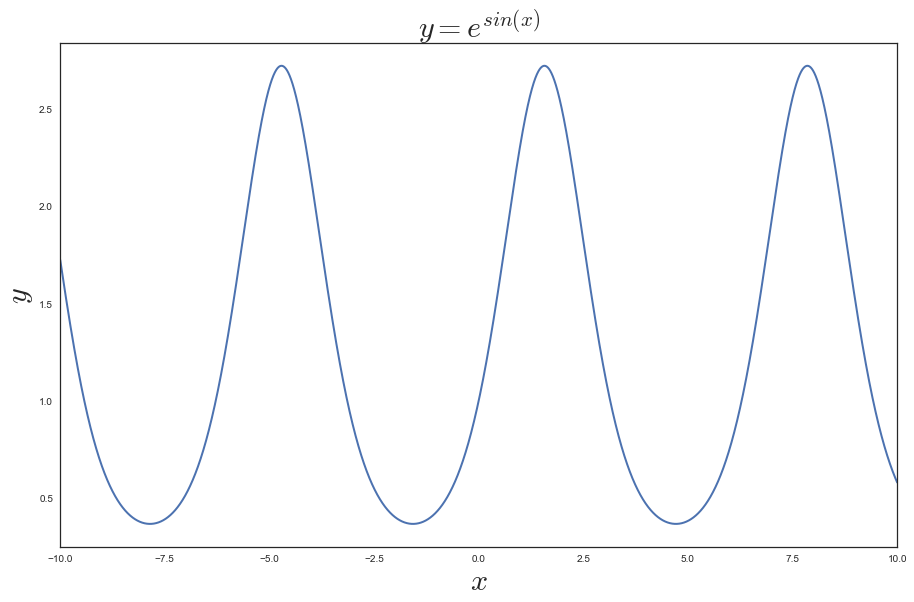

In [9]:
from math import exp,sin

f = lambda x: exp(sin(x))
fplot(f,-10,10,title='y=e^{sin(x)}')

## 三、绘制多个函数图像

有时候我们也需要在同一个图形中绘制多个函数图像，一个个的去绘制当然比较麻烦，所以我们也可能编写一个同时绘制多个函数图像的函数。为了更好的区分多个函数，除了不同函数曲线使用不同颜色外，我们也可以使用不同的线型，从而可以看得更清楚，哪怕在黑白打印时也不会影响识别的效果。除此之外，我们还可以为每个函数加上标签，这样才能看出不同颜色与线型分别对应那个函数。

In [28]:
def fplots(funcList,beg,end,legendList,loc=2,legendsize=20,lw=2):
    x = np.arange(beg,end+0.001,0.001)
    style = ['solid','dashed','dashdot','dotted']
    styleList = style[:len(funcList)]
    ldlist = ['$'+x+'$' for x in legendList]
    for func,label,linestyle in zip(funcList,ldlist,styleList):
        y = [func(i) for i in x]
        plt.plot(x,y,linewidth=lw,label=label,linestyle=linestyle)
    plt.legend(loc=loc,frameon=True,fontsize=legendsize)

`fplots`函数的参数有七个，前四个是必要参数，后三个是可选参数，分别表示的意思如下：

- funcList:需要绘制的函数的列表；
- beg：绘制函数的左端点
- end: 绘制函数的右端点
- legendList: 函数标签的列表，顺序应与函数列表的顺序一致
- loc: 标签显示的位置，默认为2，即左上角；1，3，4分别代表右上角、左下角与右下角
- legendsize: 标签中文字的大小，默认为20
- lw: 线形的宽度，默认为2

下面，我们看一个示例：

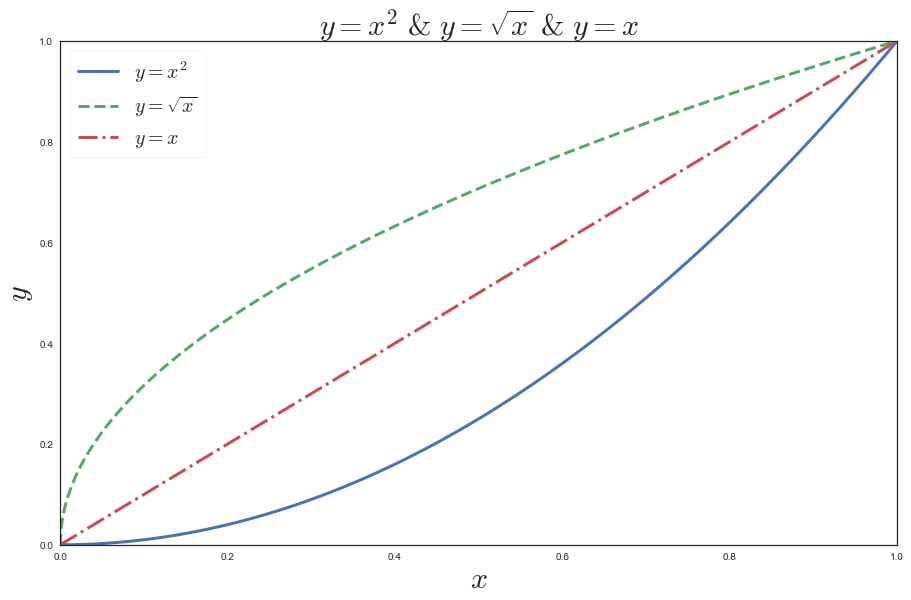

In [32]:
from math import sqrt

f = lambda x:x**2
g = lambda x:sqrt(x)
h = lambda x:x

fplots([f,g,h],0,1,['y=x^2','y=\sqrt{x}','y=x'],lw=3)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel(latex('x'),fontsize=30)
plt.ylabel(latex('y'),fontsize=30)
plt.title(latex('y=x^2 & y=\sqrt{x} & y=x'),fontsize=30)

从以上示例我们可以看到，我们可以绘制函数后再加上其它matplotlib中其它的绘图命令来对函数图形进行修改调整，比如添加标签，定义X与Y轴的取值范围等。

## 四、为图形添加平滑

在使用matplotlib绘图时有时会碰到图像不够平滑的问题，这虽然不影响绘制的准确性，但有时显得不够美观。因此，我们不影响绘制准确性的的情况下，为图形添加一定的平滑。我本以为matplotlib库中应该有这个选项，正如excel绘图时可以添加平滑性一样，但是怎么找都没有找到。经过搜索网络才知道有很多人也问了类似的问题，但matplotlib库中确实没有这项功能，不过可以通过自己编写函数来较为容易的实现，实现的方法参考了stackoverflow上的[这个回答](https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot)。

实现的原理大致是这样的，使用[三次样条插值](https://en.wikipedia.org/wiki/Spline_interpolation)，它的基本思想是，在由两相邻节点所构成的每一个小区间内用低次多项式来逼近，并且在各结点的连接处又保证是光滑的(即导数连续)。`scipy`库有样条插值的相关函数，直接调用即可，不需要自己去实现，具体见以下代码：

In [34]:
def smooth_plot(x,y,area=False,color='b',ls='solid',lw=1):
    from scipy.interpolate import spline
    x_np,y_np = np.array(x),np.array(y)
    xnew = np.linspace(x_np.min(),x_np.max(),300)
    y_smooth = spline(x_np,y,xnew)
    if area == True:
        plt.fill_between(xnew,y_smooth,color=color)
    else:
        plt.plot(xnew,y_smooth,color=color,linestyle=ls,linewidth=lw)

函数包含六个参数，其中两个必选参数，四个可选参数，含义分别如下：

- x: 自变量；
- y: 因变量；
- area: 是否绘制为面积图，默认为False，即不绘制；
- color: 函数图像的颜色，默认为蓝色；
- ls: 线型，默认为实线；
- lw：线宽，默认为1

下面我们看一下示例，分别绘制没有添加平滑和添加平滑后的图形：

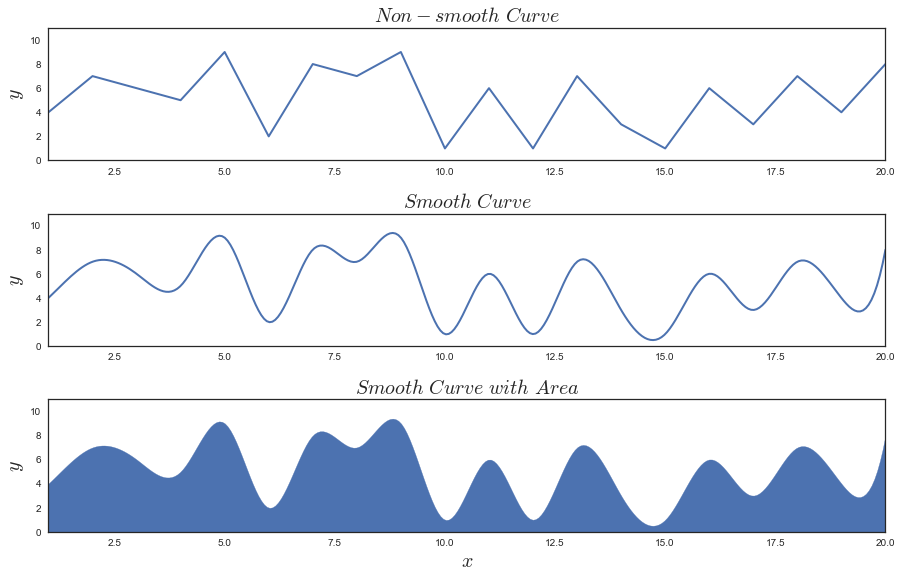

In [55]:
np.random.seed(1234)
x = np.arange(1,21)
y = np.random.randint(1,10,20)

plt.subplot(311)
plt.plot(x,y,linewidth=2)
plt.xlim(1,20)
plt.ylim(0,11)
plt.ylabel(latex('y'),fontsize=20)
plt.title(latex('Non-smooth Curve'),fontsize=20)
plt.subplot(312)
smooth_plot(x,y,lw=2)
plt.xlim(1,20)
plt.ylim(0,11)
plt.ylabel(latex('y'),fontsize=20)
plt.title(latex('Smooth Curve'),fontsize=20)
plt.subplot(313)
smooth_plot(x,y,area=True)
plt.xlim(1,20)
plt.ylim(0,11)
plt.xlabel(latex('x'),fontsize=20)
plt.ylabel(latex('y'),fontsize=20)
plt.title(latex('Smooth Curve with Area'),fontsize=20)
subplots_adjust(hspace=0.4)

显然，第二张图形和第一张图形反映出的数据的趋势或走向是一样的，只是加了一些平滑性，所以看上去更加美观一些。第三张图形和第二张图形是一致的，只是换成了面积图，有时候可以通过这种方式变换一下风格。

## 五、结语

以上就是我现在主要用到的一些辅助函数，如果之后有添加，我还会继续更新这篇文章。

函数作为一种抽象与封装的方式，可以大大提高我们编写代码的效率，提高程序的健壮性与可维护性，建议大家可以把日常工作中重复使用的一些功能编写成函数，然后通过函数组合来实现更复杂的功能。虽然python并不是一个函数式语言，但这种函数式编程的思想还是可以应用的，这篇短文就是一个简单的示例。